In [62]:
import pymysql
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Connection to AWS Database

In [4]:
DB_HOST= "ai300-capstone-db.c2ced10ceyki.ap-southeast-1.rds.amazonaws.com"
DB_NAME="capstone"
DB_USER="student"
DB_PWD="ZXLNo#sJI0K*uT3h&4spyDebP"
CURSORCLASS = pymysql.cursors.DictCursor

def initiate_local_connection():
    try:
        connection = pymysql.connect(host=DB_HOST,
                                     user=DB_USER,
                                     passwd=DB_PWD,
                                     db=DB_NAME,
                                     cursorclass=CURSORCLASS)
        print('[+] Local Connection Successful')
    except Exception as e:
        print(f'[+] Local Connection Failed: {e}')
        connection = None

    return connection

# Call function and return the connection object
connection = initiate_local_connection()

[+] Local Connection Successful


## Fetch dataframe from Database

### Try churn_staus table

In [5]:
# Create a Cursor object
cursor = connection.cursor()

# Query and receive result set
query = "SELECT * FROM churn_status"
cursor.execute(query)

# Fetch the results of the query
data = cursor.fetchall()

# Convert the results to a pandas DataFrame
df_churn = pd.DataFrame(data, columns=[column[0] for column in cursor.description])

df_churn

,customer_id,customer_status,churn_label,churn_category,churn_reason
0,0002-ORFBO,Stayed,No,None,None
1,0003-MKNFE,Stayed,No,None,None
2,0004-TLHLJ,Churned,Yes,Competitor,Competitor had better devices
3,0011-IGKFF,Churned,Yes,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Churned,Yes,Dissatisfaction,Network reliability
...,...,...,...,...,...
7038,9987-LUTYD,Stayed,No,None,None
7039,9992-RRAMN,Churned,Yes,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Joined,No,None,None
7041,9993-LHIEB,Stayed,No,None,None


### Converting previous code into a function get_df

In [6]:
def get_df(name, cursor):
    query = "SELECT * FROM " + name
    cursor.execute(query)
    data = cursor.fetchall()
    
    # Convert the results to a pandas DataFrame
    df = pd.DataFrame(data, columns=[column[0] for column in cursor.description])
    return df

In [7]:
df_account = get_df("account", cursor)
df_account

,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,payment_method
0,AAJU-HMJLK,0334-ZFJSR,55,0,Yes,Cable,No,Yes,Yes,Yes,Yes,Yes,No,One Year,Yes,Credit Card
1,AAKY-HUGJV,6235-VDHOM,5,0,Yes,DSL,Yes,No,No,No,No,Yes,No,Month-to-Month,No,Bank Withdrawal
2,AAMB-TJYWC,4006-HKYHO,63,0,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal
3,AANL-MWPZF,3258-SYSWS,72,0,Yes,Fiber Optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal
4,AAOS-KANBS,5360-XGYAZ,72,1,Yes,DSL,No,No,No,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,ZZHC-VLZUC,1169-SAOCL,49,0,Yes,Fiber Optic,No,Yes,Yes,Yes,No,Yes,No,One Year,Yes,Bank Withdrawal
7039,ZZKH-HTGCT,7115-IRDHS,72,3,No,None,No,Yes,Yes,No,No,No,No,Two Year,No,Bank Withdrawal
7040,ZZPL-VSYXD,5119-KEPFY,36,3,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal
7041,ZZUR-SCFQL,3926-CUQZX,1,0,Yes,DSL,Yes,Yes,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal


In [8]:
df_usage = get_df("account_usage", cursor)
df_usage

,account_id,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds
0,AAJU-HMJLK,35.38,1945.90,13,No,No,No,66.05,3462.10,44.53
1,AAKY-HUGJV,0.00,0.00,26,No,No,No,28.45,131.05,0.00
2,AAMB-TJYWC,29.58,1863.54,47,Yes,Yes,Yes,86.70,5309.50,0.00
3,AANL-MWPZF,24.67,1776.24,26,Yes,Yes,No,113.80,7845.80,0.00
4,AAOS-KANBS,0.00,0.00,16,Yes,Yes,Yes,65.65,4664.50,0.00
...,...,...,...,...,...,...,...,...,...,...
7038,ZZHC-VLZUC,22.52,1103.48,25,Yes,Yes,Yes,106.65,5168.10,0.00
7039,ZZKH-HTGCT,24.42,1758.24,0,No,No,No,24.65,1830.05,0.00
7040,ZZPL-VSYXD,5.99,215.64,6,Yes,Yes,Yes,95.00,3440.25,0.00
7041,ZZUR-SCFQL,11.06,11.06,58,No,No,Yes,45.10,45.10,0.00


In [9]:
df_customer = get_df("customer", cursor)
df_customer

,customer_id,gender,age,senior_citizen,married,num_dependents,zip_code
0,0002-ORFBO,Female,37,No,Yes,0,93225
1,0003-MKNFE,Male,46,No,No,0,91206
2,0004-TLHLJ,Male,50,No,No,0,92627
3,0011-IGKFF,Male,78,Yes,Yes,0,94553
4,0013-EXCHZ,Female,75,Yes,Yes,0,93010
...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,No,0,91941
7039,9992-RRAMN,Male,40,No,Yes,0,95367
7040,9992-UJOEL,Male,22,No,No,0,95432
7041,9993-LHIEB,Male,21,No,Yes,0,92075


In [10]:
df_city = get_df("city", cursor)
df_city

,area_id,zip_code,city_name,latitude,longitude,population
0,1,90001,Los Angeles,33.9736,-118.249,54492
1,2,90002,Los Angeles,33.9493,-118.247,44586
2,3,90003,Los Angeles,33.9641,-118.273,58198
3,4,90004,Los Angeles,34.0763,-118.311,67852
4,5,90005,Los Angeles,34.0593,-118.307,43019
...,...,...,...,...,...,...
1621,1622,96143,Kings Beach,39.2467,-120.029,4806
1622,1623,96145,Tahoe City,39.1783,-120.163,4002
1623,1624,96146,Olympic Valley,39.1918,-120.212,942
1624,1625,96148,Tahoe Vista,39.2412,-120.055,678


In [11]:
# Close the connection
connection.close()

## EDA
#### Target column: churn_label

In [30]:
# Check for missing data
missing_values = df_churn[df_churn['churn_label'].isna()]
missing_values

,customer_id,customer_status,churn_label,churn_category,churn_reason
112,0196-VULGZ,Churned,None,Other,Deceased
142,0235-KGSLC,Churned,None,Other,Moved
251,0378-NHQXU,Churned,None,Other,Deceased
385,0568-ONFPC,Churned,None,Other,Moved
676,0991-BRRFB,Churned,None,Other,Deceased
823,1205-WNWPJ,Churned,None,Other,Moved
952,1383-EZRWL,Churned,None,Other,Moved
1007,1455-ESIQH,Churned,None,Other,Moved
1054,1541-ETJZO,Churned,None,Other,Moved
1111,1624-NALOJ,Churned,None,Other,Moved


In [31]:
# Since the missing data appears to be all Churned customers, set it to "Yes" 
df_churn.loc[df_churn['churn_label'].isna(), 'churn_label'] = "Yes"

In [46]:
def binarize(value):
    if value in ['Yes', 'Y']:
        return 1
    elif value in ['No', 'N']:
        return 0

df_churn['churn_label'] =df_churn['churn_label'].apply(binarize)
df_churn['churn_label'].head()

0    None
1    None
2    None
3    None
4    None
Name: churn_label, dtype: object

#### churn table
Remove churn_category and churn_reason -> same as churn_label as in we can only get this value if we know "yes" or "no" for churn_label

In [37]:
# keep only customer_id, customer_status, churn_label
df_new_churn = df_churn[["customer_id","customer_status","churn_label"]]
df_new_churn.head()

,customer_id,customer_status,churn_label
0,0002-ORFBO,Stayed,0
1,0003-MKNFE,Stayed,0
2,0004-TLHLJ,Churned,1
3,0011-IGKFF,Churned,1
4,0013-EXCHZ,Churned,1


#### Join churn table to customer table to get particulars

In [38]:
df_churn_cust = pd.merge(df_new_churn, df_customer, on='customer_id', how='left')
df_churn_cust.head()

,customer_id,customer_status,churn_label,gender,age,senior_citizen,married,num_dependents,zip_code
0,0002-ORFBO,Stayed,0,Female,37,No,Yes,0,93225
1,0003-MKNFE,Stayed,0,Male,46,No,No,0,91206
2,0004-TLHLJ,Churned,1,Male,50,No,No,0,92627
3,0011-IGKFF,Churned,1,Male,78,Yes,Yes,0,94553
4,0013-EXCHZ,Churned,1,Female,75,Yes,Yes,0,93010


#### Price is probably a good feature -> join table to account_usage

In [67]:
df_temp = pd.merge(df_churn_cust, df_account, on='customer_id', how='left')
df_final = pd.merge(df_temp, df_usage, on='account_id', how='left')
df_final

,customer_id,customer_status,churn_label,gender,age,senior_citizen,married,num_dependents,zip_code,account_id,...,payment_method,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds
0,0002-ORFBO,Stayed,0,0,37,0,1,0,93225,XSWV-PAYXZ,...,Credit Card,42.39,381.51,16,Yes,No,No,65.60,593.30,0.00
1,0003-MKNFE,Stayed,0,1,46,0,0,0,91206,VFUN-NFDPJ,...,Credit Card,10.69,96.21,10,No,Yes,Yes,59.90,542.40,38.33
2,0004-TLHLJ,Churned,1,1,50,0,0,0,92627,NFEJ-WVYXF,...,Bank Withdrawal,33.65,134.60,30,No,No,No,73.90,280.85,0.00
3,0011-IGKFF,Churned,1,1,78,1,1,0,94553,VOAC-QSDER,...,Bank Withdrawal,27.82,361.66,4,Yes,Yes,No,98.00,1237.85,0.00
4,0013-EXCHZ,Churned,1,0,75,1,1,0,93010,BFIN-DLMOA,...,Credit Card,7.38,22.14,11,Yes,No,No,83.90,267.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Stayed,0,0,20,0,0,0,91941,HDCC-OWUTY,...,Credit Card,46.68,606.84,59,No,No,Yes,55.15,742.90,0.00
7039,9992-RRAMN,Churned,1,1,40,0,1,0,95367,TUYF-QYLVG,...,Bank Withdrawal,16.20,356.40,17,No,Yes,Yes,85.10,1873.70,0.00
7040,9992-UJOEL,Joined,0,1,22,0,0,0,95432,PCTD-RXANG,...,Credit Card,18.62,37.24,51,No,No,No,50.30,92.75,0.00
7041,9993-LHIEB,Stayed,0,1,21,0,1,0,92075,JKGN-GMTXE,...,Credit Card,2.12,142.04,58,No,Yes,Yes,67.85,4627.65,0.00


#### Check for missing data

In [68]:
num_missing_values = df_final.isna().sum()
num_missing_values

customer_id                      0
customer_status                  0
churn_label                      0
gender                           0
age                              0
senior_citizen                   0
married                          0
num_dependents                   0
zip_code                         0
account_id                       0
tenure_months                    0
num_referrals                    0
has_internet_service             0
internet_type                    0
has_unlimited_data               0
has_phone_service                0
has_multiple_lines               0
has_premium_tech_support         0
has_online_security              0
has_online_backup                0
has_device_protection            0
contract_type                    0
paperless_billing                0
payment_method                   0
avg_long_distance_fee_monthly    0
total_long_distance_fee          0
avg_gb_download_monthly          0
stream_tv                        0
stream_movie        

#### keep only the values we want
churn_label, gender, age, senior_citizen, married, num_dependents, num_referals, avg_gb_download_monthly, total_monthly_fee, total_charges_quarter

In [69]:
df_final = df_final[["churn_label", "gender", "age", "senior_citizen", "married", "num_dependents",
                     "num_referrals", "avg_gb_download_monthly", "total_monthly_fee", "total_charges_quarter"]]
df_final

,churn_label,gender,age,senior_citizen,married,num_dependents,num_referrals,avg_gb_download_monthly,total_monthly_fee,total_charges_quarter
0,0,0,37,0,1,0,2,16,65.60,593.30
1,0,1,46,0,0,0,0,10,59.90,542.40
2,1,1,50,0,0,0,0,30,73.90,280.85
3,1,1,78,1,1,0,1,4,98.00,1237.85
4,1,0,75,1,1,0,3,11,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...
7038,0,0,20,0,0,0,0,59,55.15,742.90
7039,1,1,40,0,1,0,1,17,85.10,1873.70
7040,0,1,22,0,0,0,0,51,50.30,92.75
7041,0,1,21,0,1,0,5,58,67.85,4627.65


#### Binarize the gender, senior_citizen, married

In [70]:
df_final['gender'] = df_final['gender'].replace({'Female': 0, 'Male': 1})
df_final['senior_citizen'] = df_final['senior_citizen'].replace({'No': 0, 'Yes': 1})
df_final['married'] = df_final['married'].replace({'No': 0, 'Yes': 1})
df_final.head()

,churn_label,gender,age,senior_citizen,married,num_dependents,num_referrals,avg_gb_download_monthly,total_monthly_fee,total_charges_quarter
0,0,0,37,0,1,0,2,16,65.6,593.30
1,0,1,46,0,0,0,0,10,59.9,542.40
2,1,1,50,0,0,0,0,30,73.9,280.85
3,1,1,78,1,1,0,1,4,98.0,1237.85
4,1,0,75,1,1,0,3,11,83.9,267.40


#### Draw a heatmap based on the num_cols
age, num_dependents, num_referrals, avg_gb_download_monthly, total_monthly_fee

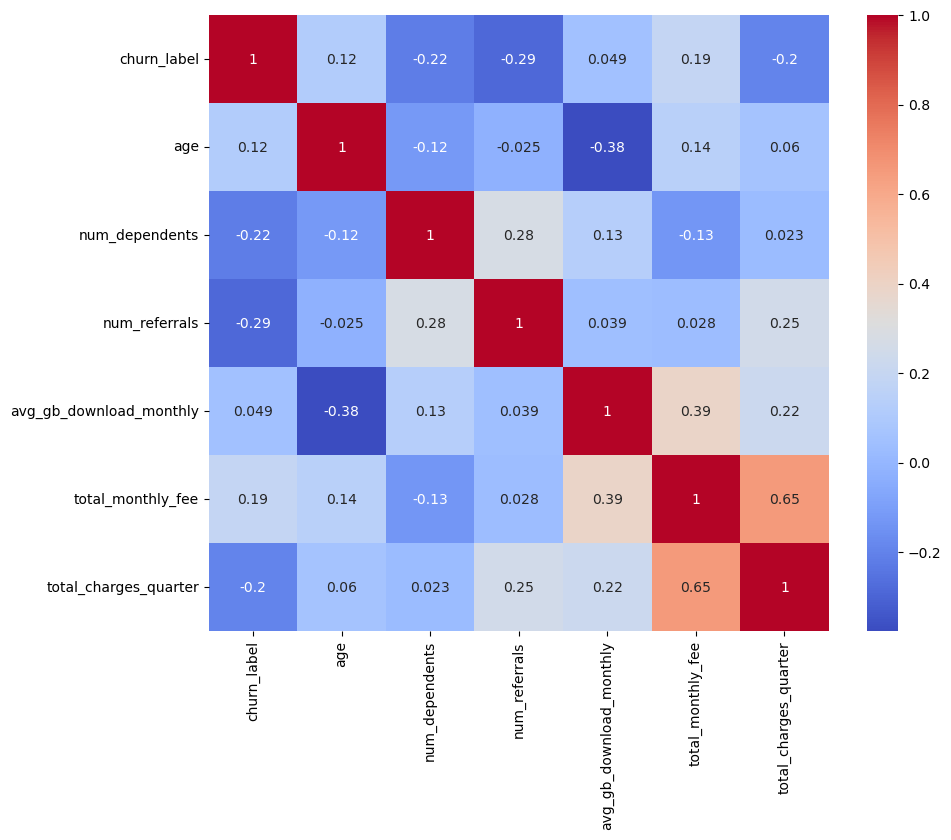

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

heat_map = df_final[["churn_label","age","num_dependents","num_referrals",
                     "avg_gb_download_monthly", "total_monthly_fee","total_charges_quarter"]]
# Assuming df is your DataFrame and 'target' is your target column
correlation_matrix = heat_map.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

In [80]:
# Split dataset into model input features and labels (aka target variable)
X = df_final.drop(columns=['churn_label'])
y = df_final['churn_label']

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [86]:
model = RandomForestClassifier()
param_grid = {  # simple example, feel free to tweak
    'n_estimators': [100, 120, 150],
    'max_depth': [8 , 9, 10]
}
# Reference: https://catboost.ai/en/docs/concepts/parameter-tuning

grid_search = GridSearchCV(model, param_grid, cv=4)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 9, 'n_estimators': 120}


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

best_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Evaluate the model with various metrics
print("AUC:", roc_auc_score(y_test, y_pred_proba))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

AUC: 0.8621584315329363
Precision Score: 0.6919642857142857
Recall Score: 0.5626134301270418
F1 Score: 0.6206206206206207


In [93]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

xgb_model = xgb.XGBClassifier(eval_metric='logloss')
parameters = {'learning_rate': [0.05], #so called `eta` value
              'max_depth': [2,3,4],
              'min_child_weight': [11,12,13],
              'colsample_bytree': [0.7,0.5],
              'n_estimators': [1000], #number of trees, change it to 1000 for better results
             }

grid_search = GridSearchCV(xgb_model, parameters, cv=4)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 11, 'n_estimators': 1000}


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

best_model = xgb.XGBClassifier(**grid_search.best_params_, random_state=42,eval_metric='logloss')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Evaluate the model with various metrics
print("AUC:", roc_auc_score(y_test, y_pred_proba))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

AUC: 0.8674433168886275
Precision Score: 0.6887417218543046
Recall Score: 0.5662431941923775
F1 Score: 0.6215139442231076
